In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes_pred.csv')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0      

In [ ]:
df.size

900000

In [ ]:
print(df.isnull().sum())

print(df.describe())

print(df['diabetes'].value_counts())


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           

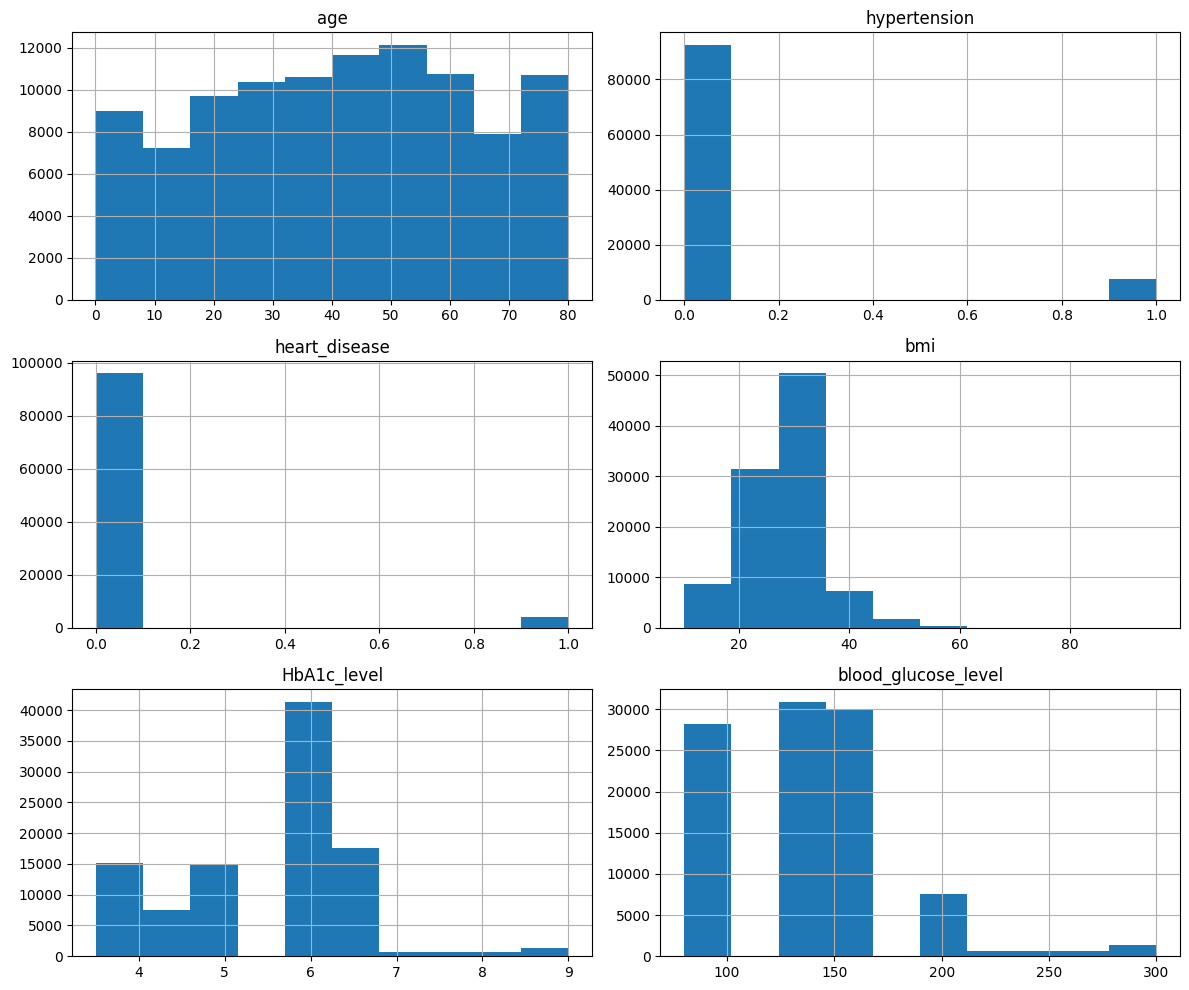

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.drop(columns='diabetes').hist(figsize=(12, 10))
plt.tight_layout()
plt.show()



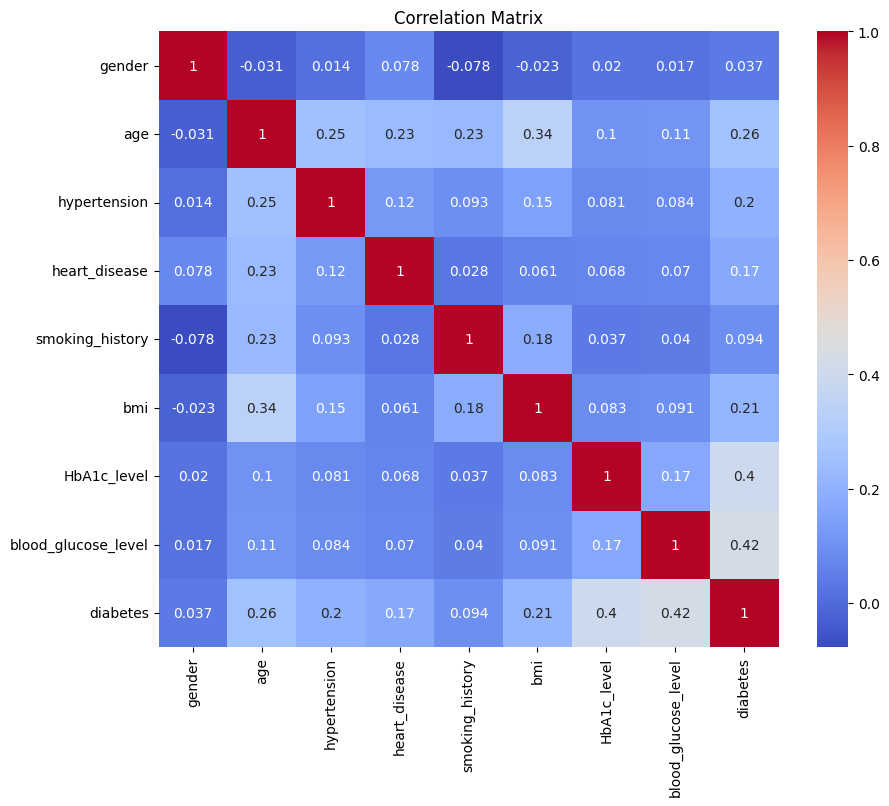

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df.drop(columns='diabetes')
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.05%


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df.drop(columns='diabetes')
y = df['diabetes']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators=100)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy: {accuracy * 100:.2f}%')

mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

Accuracy: 97.04%
Accuracy: 97.03%
Accuracy: 96.92%
Accuracy: 97.14%
Accuracy: 96.97%
Mean Accuracy: 97.02%


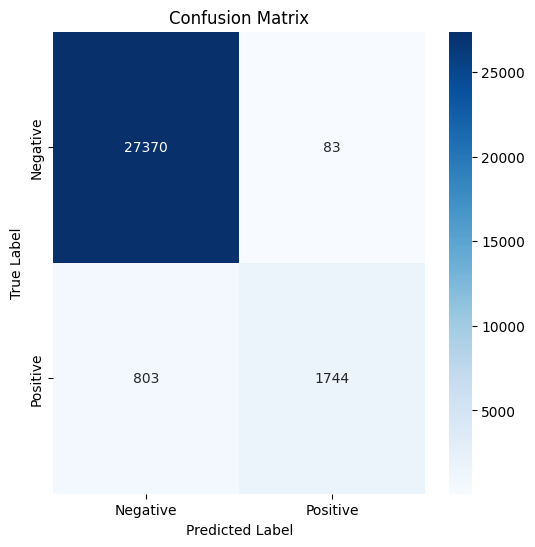

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df.drop(columns='diabetes')
y = df['diabetes']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators=100)
accuracies = []
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy: {accuracy * 100:.2f}%')

mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

Accuracy: 96.92%
Accuracy: 97.08%
Accuracy: 97.05%
Accuracy: 97.02%
Accuracy: 96.96%
Mean Accuracy: 97.00%


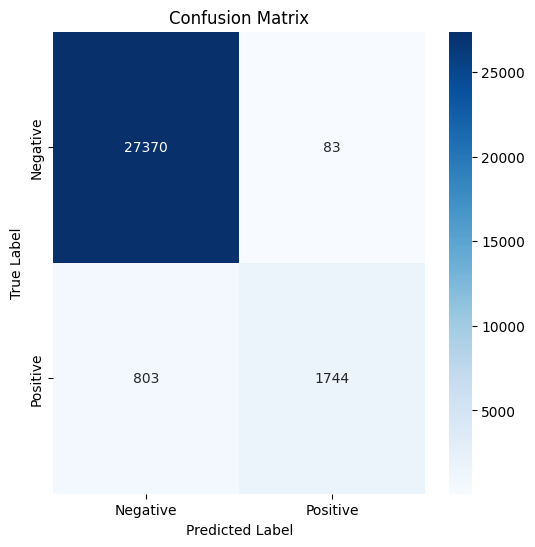

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


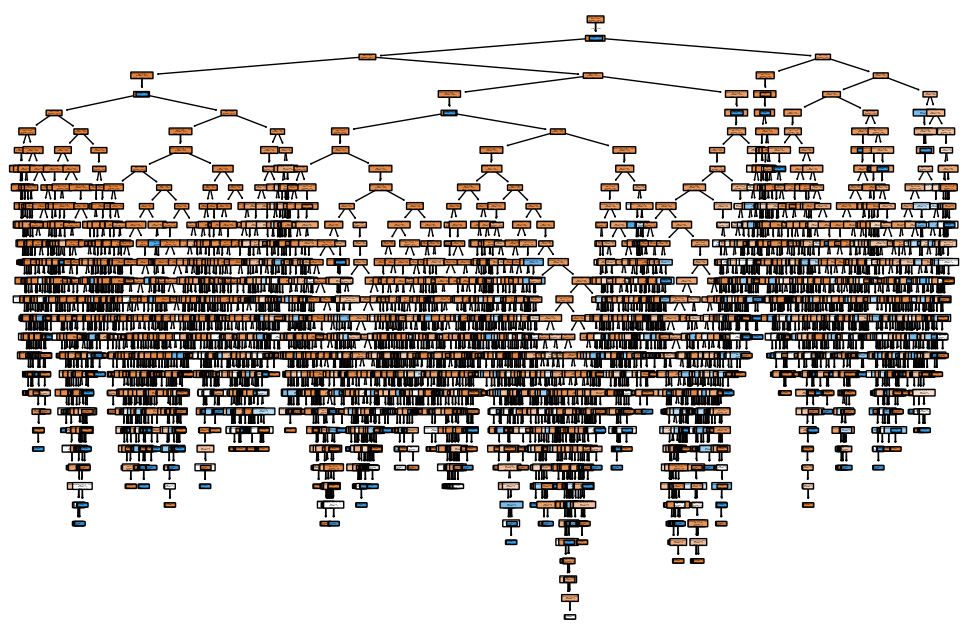

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = df.drop(columns='diabetes')
y = df['diabetes']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy: {accuracy * 100:.2f}%')


mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 95.23%
Accuracy: 95.22%
Accuracy: 95.02%
Accuracy: 95.23%
Accuracy: 95.02%
Mean Accuracy: 95.14%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18306
           1       0.70      0.73      0.71      1694

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000

Confusion Matrix:
[[17773   533]
 [  464  1230]]


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.drop(columns='diabetes')
y = df['diabetes']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42)
accuracies = []
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy: {accuracy * 100:.2f}%')


mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 95.08%
Accuracy: 95.09%
Accuracy: 95.34%
Accuracy: 95.15%
Accuracy: 94.88%
Mean Accuracy: 95.11%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18300
           1       0.69      0.73      0.71      1700

    accuracy                           0.95     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000

Confusion Matrix:
[[17731   569]
 [  456  1244]]


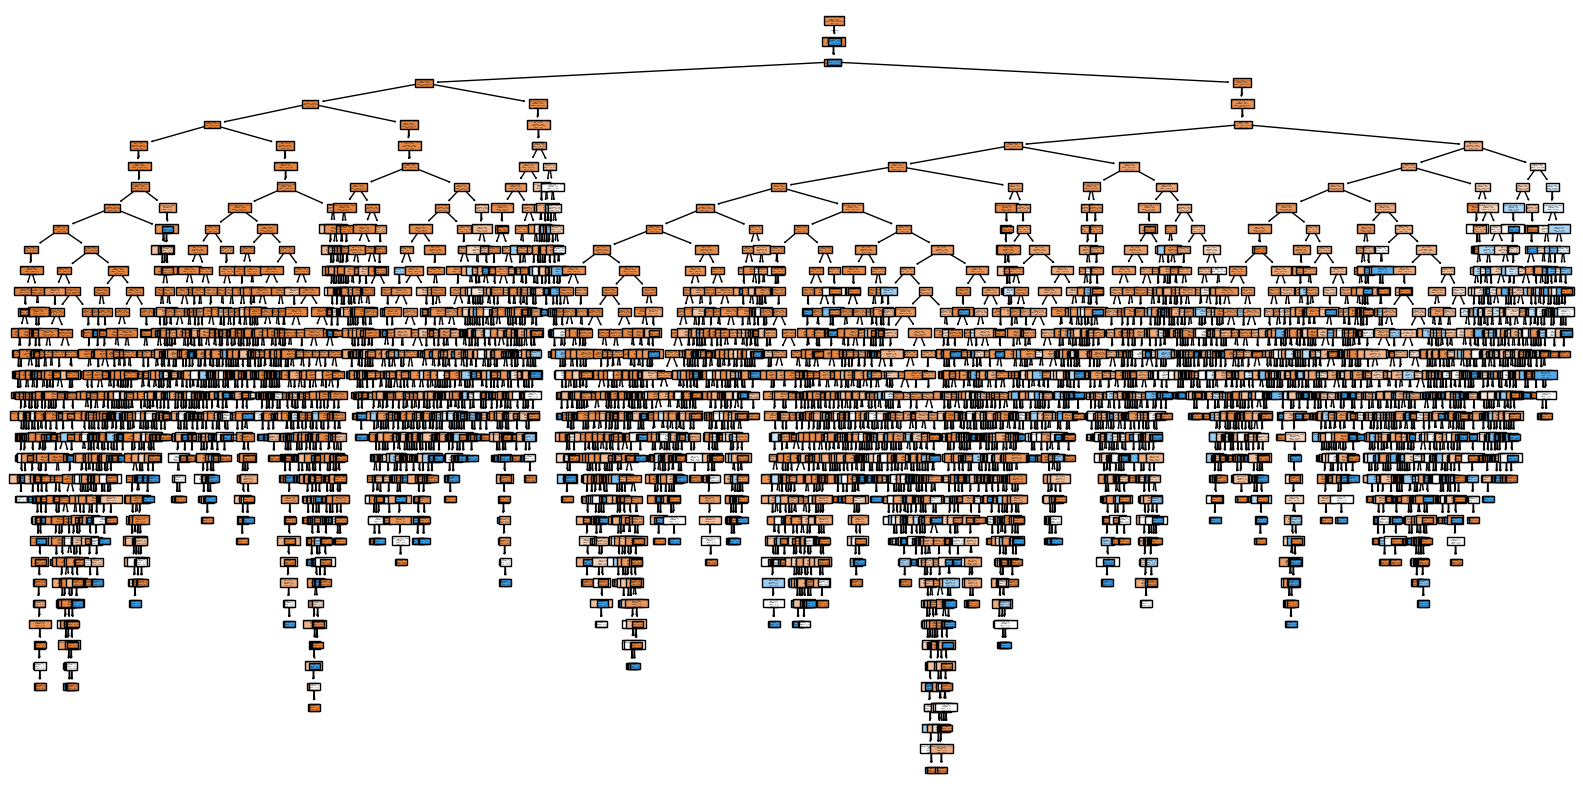

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

X = df.drop(columns='diabetes')
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

y_pred = svm.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.92


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import mode

X = df.drop(columns='diabetes')
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  RANDOM FOREST
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

#  SVM
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)

#  DECISION TREE
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)



y_pred_voted = np.array([y_pred_rf, y_pred_svm, y_pred_dt]).T
y_pred_final = mode(y_pred_voted, axis=1)[0].flatten()


accuracy = accuracy_score(y_test, y_pred_final)
print(f'Voting Accuracy: {accuracy * 100}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))


Voting Classifier Accuracy: 97.07%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27450
           1       0.94      0.70      0.80      2550

    accuracy                           0.97     30000
   macro avg       0.96      0.85      0.89     30000
weighted avg       0.97      0.97      0.97     30000


Confusion Matrix:
[[27336   114]
 [  764  1786]]
